# Movle Lens 1M Dataset
**Recommendation system exercise**

## Download Data
Grouplens web page : https://grouplens.org/datasets/movielens/1m/


## 데이터의 탐색적 분석
Movie Lens 데이터를 훑어봅니다.

In [1]:
import numpy as np
import pandas as pd

# 사용자 정보 가져오기
u_cols = ['user_id', 'gender', 'age', 'occupation', 'zip_code']
users = pd.read_csv('ml-1m/users.dat', sep='::', names=u_cols, header=None, engine='python')
users.head()

,user_id,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
# 평점 정보 가져오기
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-1m/ratings.dat', sep='::', names=r_cols, header=None, engine='python')
ratings['date'] = pd.to_datetime(ratings['unix_timestamp'],unit='s')
ratings.head()

,user_id,movie_id,rating,unix_timestamp,date
0,1,1193,5,978300760,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09
2,1,914,3,978301968,2000-12-31 22:32:48
3,1,3408,4,978300275,2000-12-31 22:04:35
4,1,2355,5,978824291,2001-01-06 23:38:11


In [7]:
# 영화 정보 가져 오기
m_cols = ['movie_id', 'title', 'ganres']
movies = pd.read_csv('ml-1m/movies.dat',  sep='::', names=m_cols, header=None, engine='python')
movies.head()

,movie_id,title,ganres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
# 사용자-평점-영화 정보 합치기
movie_rating = pd.merge(movies, ratings)
lens = pd.merge(movie_rating, users)
lens.head()

,movie_id,title,ganres,user_id,rating,unix_timestamp,date,gender,age,occupation,zip_code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,2001-01-06 23:37:48,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,2001-01-06 23:39:11,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,2000-12-31 22:29:37,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,2000-12-31 22:12:40,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,2001-01-06 23:36:35,F,1,10,48067


In [9]:
# 평가 횟수가 많은 영화 상위 25건
lens.title.value_counts()[:25]

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Princess

In [11]:
# 평점 갯수를 구하고, 평점의 평균이 높은순으로 정렬
movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.sort_values(by=[('rating', 'mean')], ascending=False).head()

rating     
                           size mean
title                               
Ulysses (Ulisse) (1954)       1  5.0
Lured (1947)                  1  5.0
Follow the Bitch (1998)       1  5.0
Bittersweet Motel (2000)      1  5.0
Song of Freedom (1936)        1  5.0

In [12]:
# 최소 100번 이상 평가된 영화에 대해서 평점평균 기준으로 정렬
atleast_100 = movie_stats['rating']['size'] >=100
movie_stats[atleast_100].sort_values(by=[('rating', 'mean')], ascending=False)[:15]

rating          
                                                     size      mean
title                                                              
Seven Samurai (The Magnificent Seven) (Shichini...    628  4.560510
Shawshank Redemption, The (1994)                     2227  4.554558
Godfather, The (1972)                                2223  4.524966
Close Shave, A (1995)                                 657  4.520548
Usual Suspects, The (1995)                           1783  4.517106
Schindler's List (1993)                              2304  4.510417
Wrong Trousers, The (1993)                            882  4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)         470  4.491489
Raiders of the Lost Ark (1981)                       2514  4.477725
Rear Window (1954)                                   1050  4.476190
Paths of Glory (1957)                                 230  4.473913
Star Wars: Episode IV - A New Hope (1977)            2991  4.453694
Third Man, The (1949)                                 480  4.452083
Dr. Strangelove or: How I Learned to Stop Worry...   1367  4.449890
Wallace & Gromit: The Best of Aardman Animation...    438  4.426941

Text(0,0.5,'count of rating')

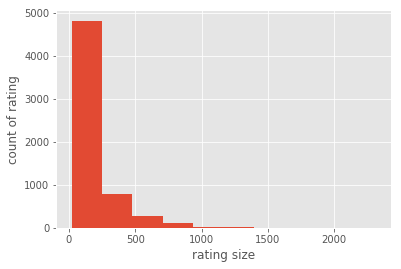

In [14]:
# 한사람당 몇 건의 영화를 평가했는지 그려보자
from matplotlib import pyplot as plt
plt.style.use('ggplot')

lens.groupby('user_id').size().sort_values(ascending=False).hist()

plt.xlabel('rating size')
plt.ylabel('count of rating')

In [15]:
# 사용자별 평점정보의 분포를 봅시다
user_stats = lens.groupby('user_id').agg({'rating': [np.size, np.mean]})
user_stats['rating'].describe()

,size,mean
count,6040.000000,6040.000000
mean,165.597517,3.702705
std,192.747029,0.429622
min,20.000000,1.015385
25%,44.000000,3.444444
50%,96.000000,3.735294
75%,208.000000,4.000000
max,2314.000000,4.962963
